## Importing necessary libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [2]:
df = pd.read_csv('./clean_data.csv')

In [3]:
df.head()

,LineRef,BlockRef,Day,VehicleJourneyRef,DestinationAimedArrivalTime,JourneyCode,Total Distance,Run Time,FromStopID,FromStopLocation,ToStopID,ToStopLocation,AimedDepartureTime,AimedArrivalTime,ActualDepartureTime,ActualArrivalTime,RouteID,ActualDepartureDateTime,ActualArrivalDateTime
0,NT1,1001.0,Wednesday,NT1-In-1001-NT260007454-2024-08-21T06:36:00-20...,06:37:00,1021.0,195.868599,PT0S,260007454,"(np.float64(-1.2052472), np.float64(52.7720907))",260007423,"(-1.202979, 52.7731152)",06:36:00,06:36:00,1900-01-01 06:26:33,1900-01-01 06:35:51,1:1_1_2147483284,2024-08-21 06:26:33+01:00,2024-08-21 06:35:51+01:00
1,NT1,1001.0,Wednesday,NT1-In-1001-NT260007454-2024-08-21T06:36:00-20...,06:37:00,1021.0,346.400087,PT1M,260007423,"(-1.202979, 52.7731152)",260007343,"(-1.1997359, 52.7754058)",06:36:00,06:37:00,1900-01-01 06:35:51,1900-01-01 06:37:42,1:1_2_2147483283,2024-08-21 06:35:51+01:00,2024-08-21 06:37:42+01:00
2,NT1,1001.0,Wednesday,NT1-In-1001-NT260007454-2024-08-21T08:56:00-20...,08:57:00,1053.0,195.868599,PT0S,260007454,"(np.float64(-1.2052472), np.float64(52.7720907))",260007423,"(-1.202979, 52.7731152)",08:56:00,08:56:00,1900-01-01 08:51:41,1900-01-01 08:57:05,1:1_1_2147483284,2024-08-21 08:51:41+01:00,2024-08-21 08:57:05+01:00
3,NT1,1001.0,Wednesday,NT1-In-1001-NT260007454-2024-08-21T08:56:00-20...,08:57:00,1053.0,346.400087,PT1M,260007423,"(-1.202979, 52.7731152)",260007343,"(-1.1997359, 52.7754058)",08:56:00,08:57:00,1900-01-01 08:57:05,1900-01-01 08:59:23,1:1_2_2147483283,2024-08-21 08:57:05+01:00,2024-08-21 08:59:23+01:00
4,NT1,1001.0,Wednesday,NT1-In-1001-NT260007454-2024-08-21T11:14:00-20...,11:15:00,1081.0,195.868599,PT0S,260007454,"(np.float64(-1.2052472), np.float64(52.7720907))",260007423,"(-1.202979, 52.7731152)",11:14:00,11:14:00,1900-01-01 11:06:27,1900-01-01 11:06:27,1:1_1_2147483284,2024-08-21 11:06:27+01:00,2024-08-21 11:06:27+01:00


Datetime attribute preprocessing

In [5]:
df['ActualDepartureTime'] = pd.to_datetime(df['ActualDepartureTime'], format='%Y-%m-%d %H:%M:%S').dt.time
df['ActualArrivalTime'] = pd.to_datetime(df['ActualArrivalTime'], format='%Y-%m-%d %H:%M:%S').dt.time
print(type(df['ActualDepartureTime'][0]))
print(type(df['ActualArrivalTime'][0]))

<class 'datetime.time'>
<class 'datetime.time'>


In [6]:
df.shape

(2941, 19)

In [7]:
df.head()


,LineRef,BlockRef,Day,VehicleJourneyRef,DestinationAimedArrivalTime,JourneyCode,Total Distance,Run Time,FromStopID,FromStopLocation,ToStopID,ToStopLocation,AimedDepartureTime,AimedArrivalTime,ActualDepartureTime,ActualArrivalTime,RouteID,ActualDepartureDateTime,ActualArrivalDateTime
0,NT1,1001.0,Wednesday,NT1-In-1001-NT260007454-2024-08-21T06:36:00-20...,06:37:00,1021.0,195.868599,PT0S,260007454,"(np.float64(-1.2052472), np.float64(52.7720907))",260007423,"(-1.202979, 52.7731152)",06:36:00,06:36:00,06:26:33,06:35:51,1:1_1_2147483284,2024-08-21 06:26:33+01:00,2024-08-21 06:35:51+01:00
1,NT1,1001.0,Wednesday,NT1-In-1001-NT260007454-2024-08-21T06:36:00-20...,06:37:00,1021.0,346.400087,PT1M,260007423,"(-1.202979, 52.7731152)",260007343,"(-1.1997359, 52.7754058)",06:36:00,06:37:00,06:35:51,06:37:42,1:1_2_2147483283,2024-08-21 06:35:51+01:00,2024-08-21 06:37:42+01:00
2,NT1,1001.0,Wednesday,NT1-In-1001-NT260007454-2024-08-21T08:56:00-20...,08:57:00,1053.0,195.868599,PT0S,260007454,"(np.float64(-1.2052472), np.float64(52.7720907))",260007423,"(-1.202979, 52.7731152)",08:56:00,08:56:00,08:51:41,08:57:05,1:1_1_2147483284,2024-08-21 08:51:41+01:00,2024-08-21 08:57:05+01:00
3,NT1,1001.0,Wednesday,NT1-In-1001-NT260007454-2024-08-21T08:56:00-20...,08:57:00,1053.0,346.400087,PT1M,260007423,"(-1.202979, 52.7731152)",260007343,"(-1.1997359, 52.7754058)",08:56:00,08:57:00,08:57:05,08:59:23,1:1_2_2147483283,2024-08-21 08:57:05+01:00,2024-08-21 08:59:23+01:00
4,NT1,1001.0,Wednesday,NT1-In-1001-NT260007454-2024-08-21T11:14:00-20...,11:15:00,1081.0,195.868599,PT0S,260007454,"(np.float64(-1.2052472), np.float64(52.7720907))",260007423,"(-1.202979, 52.7731152)",11:14:00,11:14:00,11:06:27,11:06:27,1:1_1_2147483284,2024-08-21 11:06:27+01:00,2024-08-21 11:06:27+01:00


In [9]:
# Convert the ActualDepartureDateTime and ActualArrivalDateTime columns to datetime 
df['ActualDepartureDateTime'] = pd.to_datetime(df['ActualDepartureDateTime'])
df['ActualArrivalDateTime'] = pd.to_datetime(df['ActualArrivalDateTime'])

# Extract the date from the ActualDepartureDateTime and ActualArrivalDateTime columns
df['DepartureDate'] = df['ActualDepartureDateTime'].dt.date
df['ArrivalDate'] = df['ActualArrivalDateTime'].dt.date

# Combine the extracted dates with the times from AimedDepartureTime, AimedArrivalTime, ActualDepartureTime, and ActualArrivalTime
for col in ['AimedDepartureTime', 'AimedArrivalTime', 'ActualDepartureTime', 'ActualArrivalTime']:
    # Convert time to string 
    df[col] = df[col].astype(str)
    
    if 'Departure' in col:
        df[col] = pd.to_datetime(df['DepartureDate'].astype(str) + ' ' + df[col])
    else:
        df[col] = pd.to_datetime(df['ArrivalDate'].astype(str) + ' ' + df[col])

# Calculate travel time in minutes
df['TravelTime'] = (df['ActualArrivalTime'] - df['ActualDepartureTime']).dt.total_seconds()/60 # changed to time in seconds
df['TravelTimeInSeconds'] = (df['ActualArrivalTime'] - df['ActualDepartureTime']).dt.total_seconds() # changed to time in seconds

# Display the first few rows to verify
df.head()

,LineRef,BlockRef,Day,VehicleJourneyRef,DestinationAimedArrivalTime,JourneyCode,Total Distance,Run Time,FromStopID,FromStopLocation,...,AimedArrivalTime,ActualDepartureTime,ActualArrivalTime,RouteID,ActualDepartureDateTime,ActualArrivalDateTime,DepartureDate,ArrivalDate,TravelTime,TravelTimeInSeconds
0,NT1,1001.0,Wednesday,NT1-In-1001-NT260007454-2024-08-21T06:36:00-20...,06:37:00,1021.0,195.868599,PT0S,260007454,"(np.float64(-1.2052472), np.float64(52.7720907))",...,2024-08-21 06:36:00,2024-08-21 06:26:33,2024-08-21 06:35:51,1:1_1_2147483284,2024-08-21 06:26:33+01:00,2024-08-21 06:35:51+01:00,2024-08-21,2024-08-21,9.30,558.0
1,NT1,1001.0,Wednesday,NT1-In-1001-NT260007454-2024-08-21T06:36:00-20...,06:37:00,1021.0,346.400087,PT1M,260007423,"(-1.202979, 52.7731152)",...,2024-08-21 06:37:00,2024-08-21 06:35:51,2024-08-21 06:37:42,1:1_2_2147483283,2024-08-21 06:35:51+01:00,2024-08-21 06:37:42+01:00,2024-08-21,2024-08-21,1.85,111.0
2,NT1,1001.0,Wednesday,NT1-In-1001-NT260007454-2024-08-21T08:56:00-20...,08:57:00,1053.0,195.868599,PT0S,260007454,"(np.float64(-1.2052472), np.float64(52.7720907))",...,2024-08-21 08:56:00,2024-08-21 08:51:41,2024-08-21 08:57:05,1:1_1_2147483284,2024-08-21 08:51:41+01:00,2024-08-21 08:57:05+01:00,2024-08-21,2024-08-21,5.40,324.0
3,NT1,1001.0,Wednesday,NT1-In-1001-NT260007454-2024-08-21T08:56:00-20...,08:57:00,1053.0,346.400087,PT1M,260007423,"(-1.202979, 52.7731152)",...,2024-08-21 08:57:00,2024-08-21 08:57:05,2024-08-21 08:59:23,1:1_2_2147483283,2024-08-21 08:57:05+01:00,2024-08-21 08:59:23+01:00,2024-08-21,2024-08-21,2.30,138.0
4,NT1,1001.0,Wednesday,NT1-In-1001-NT260007454-2024-08-21T11:14:00-20...,11:15:00,1081.0,195.868599,PT0S,260007454,"(np.float64(-1.2052472), np.float64(52.7720907))",...,2024-08-21 11:14:00,2024-08-21 11:06:27,2024-08-21 11:06:27,1:1_1_2147483284,2024-08-21 11:06:27+01:00,2024-08-21 11:06:27+01:00,2024-08-21,2024-08-21,0.00,0.0


In [10]:
df.shape

(2941, 23)

In [11]:
df.head()

,LineRef,BlockRef,Day,VehicleJourneyRef,DestinationAimedArrivalTime,JourneyCode,Total Distance,Run Time,FromStopID,FromStopLocation,...,AimedArrivalTime,ActualDepartureTime,ActualArrivalTime,RouteID,ActualDepartureDateTime,ActualArrivalDateTime,DepartureDate,ArrivalDate,TravelTime,TravelTimeInSeconds
0,NT1,1001.0,Wednesday,NT1-In-1001-NT260007454-2024-08-21T06:36:00-20...,06:37:00,1021.0,195.868599,PT0S,260007454,"(np.float64(-1.2052472), np.float64(52.7720907))",...,2024-08-21 06:36:00,2024-08-21 06:26:33,2024-08-21 06:35:51,1:1_1_2147483284,2024-08-21 06:26:33+01:00,2024-08-21 06:35:51+01:00,2024-08-21,2024-08-21,9.30,558.0
1,NT1,1001.0,Wednesday,NT1-In-1001-NT260007454-2024-08-21T06:36:00-20...,06:37:00,1021.0,346.400087,PT1M,260007423,"(-1.202979, 52.7731152)",...,2024-08-21 06:37:00,2024-08-21 06:35:51,2024-08-21 06:37:42,1:1_2_2147483283,2024-08-21 06:35:51+01:00,2024-08-21 06:37:42+01:00,2024-08-21,2024-08-21,1.85,111.0
2,NT1,1001.0,Wednesday,NT1-In-1001-NT260007454-2024-08-21T08:56:00-20...,08:57:00,1053.0,195.868599,PT0S,260007454,"(np.float64(-1.2052472), np.float64(52.7720907))",...,2024-08-21 08:56:00,2024-08-21 08:51:41,2024-08-21 08:57:05,1:1_1_2147483284,2024-08-21 08:51:41+01:00,2024-08-21 08:57:05+01:00,2024-08-21,2024-08-21,5.40,324.0
3,NT1,1001.0,Wednesday,NT1-In-1001-NT260007454-2024-08-21T08:56:00-20...,08:57:00,1053.0,346.400087,PT1M,260007423,"(-1.202979, 52.7731152)",...,2024-08-21 08:57:00,2024-08-21 08:57:05,2024-08-21 08:59:23,1:1_2_2147483283,2024-08-21 08:57:05+01:00,2024-08-21 08:59:23+01:00,2024-08-21,2024-08-21,2.30,138.0
4,NT1,1001.0,Wednesday,NT1-In-1001-NT260007454-2024-08-21T11:14:00-20...,11:15:00,1081.0,195.868599,PT0S,260007454,"(np.float64(-1.2052472), np.float64(52.7720907))",...,2024-08-21 11:14:00,2024-08-21 11:06:27,2024-08-21 11:06:27,1:1_1_2147483284,2024-08-21 11:06:27+01:00,2024-08-21 11:06:27+01:00,2024-08-21,2024-08-21,0.00,0.0


In [12]:
#displaying first row
print(df.iloc[0])

LineRef                                                                      NT1
BlockRef                                                                  1001.0
Day                                                                    Wednesday
VehicleJourneyRef              NT1-In-1001-NT260007454-2024-08-21T06:36:00-20...
DestinationAimedArrivalTime                                             06:37:00
JourneyCode                                                               1021.0
Total Distance                                                        195.868599
Run Time                                                                    PT0S
FromStopID                                                             260007454
FromStopLocation                (np.float64(-1.2052472), np.float64(52.7720907))
ToStopID                                                               260007423
ToStopLocation                                           (-1.202979, 52.7731152)
AimedDepartureTime          

In [15]:
#informative statistics of time features
desc_adt = df[['ActualDepartureTime']].describe()
desc_aat = df[['ActualArrivalTime']].describe()
desc_tt = df[['TravelTime']].describe()

print(desc_tt)

        TravelTime
count  2941.000000
mean      1.363567
std       2.670143
min       0.000000
25%       0.000000
50%       0.350000
75%       1.666667
max      27.433333


In [16]:

print(desc_adt)


                 ActualDepartureTime
count                           2941
mean   2024-08-25 22:00:40.862291968
min              2024-08-21 06:26:33
25%              2024-08-22 00:23:51
50%              2024-08-23 09:43:05
75%              2024-08-30 00:07:16
max              2024-09-02 16:42:03


In [17]:

print(desc_aat)

                   ActualArrivalTime
count                           2941
mean   2024-08-25 22:02:02.676300544
min              2024-08-21 06:35:51
25%              2024-08-22 00:23:51
50%              2024-08-23 09:43:53
75%              2024-08-30 00:07:16
max              2024-09-02 16:42:03


## Time-features processing

In [18]:
from IPython.display import display
# Calculate differences in minutes
df['ArrivalDifference'] = (df['ActualArrivalTime'] - df['AimedArrivalTime']).dt.total_seconds() / 60
df['DepartureDifference'] = (df['ActualDepartureTime'] - df['AimedDepartureTime']).dt.total_seconds() / 60

# Group by JourneyCode and VehicleJourneyRef
grouped = df.groupby(['JourneyCode', 'VehicleJourneyRef'])

# Apply descriptive statistics on each group
difference_stats_grouped = grouped[['ArrivalDifference', 'DepartureDifference']].describe()

# Resetting index to make more readable
difference_stats_grouped_reset = difference_stats_grouped.reset_index()

# Display the DataFrame in  tabular format
# print(difference_stats_grouped_reset)
display(difference_stats_grouped_reset)
#  Flattening the multi-level columns
difference_stats_grouped_reset.columns = ['_'.join(col).strip() for col in difference_stats_grouped_reset.columns.values]


JourneyCode                                  VehicleJourneyRef  \
                                                                     
0        1005.0  NT1-Out-2001-NT3390B2-2024-08-22T00:02:00-2024...   
1        1005.0  NT1-Out-2001-NT3390B2-2024-08-23T00:02:00-2024...   
2        1005.0  NT1-Out-2001-NT3390B2-2024-08-30T00:02:00-2024...   
3        1006.0  NT1-Out-2001-NT3390B2-2024-08-22T00:02:00-2024...   
4        1006.0  NT1-Out-2001-NT3390B2-2024-08-23T00:02:00-2024...   
..          ...                                                ...   
333      2094.0  NT1-Out-1001-NT3390B2-2024-08-31T14:40:00-2024...   
334      2105.0  NT1-In-4001-NT260007454-2024-08-31T14:34:00-20...   
335      2114.0  NT1-Out-6001-NT3390B2-2024-08-31T16:20:00-2024...   
336      3018.0  NT1-Out-1001-NT3390B2-2024-09-01T11:00:00-2024...   
337      3045.0  NT1-In-1001-NT260007454-2024-09-01T12:19:00-20...   

    ArrivalDifference                                                 \
                count        mean        std         min         25%   
0                26.0 -340.248077  14.805077 -364.300000 -351.137500   
1                26.0 -339.812821  14.847907 -363.816667 -350.533333   
2                27.0 -342.600000  16.998089 -370.150000 -355.233333   
3                57.0 -384.820760  10.228324 -409.150000 -394.150000   
4                56.0 -383.476190   9.237804 -406.500000 -391.500000   
..                ...         ...        ...         ...         ...   
333               6.0   -1.213889   2.312344   -5.816667   -0.733333   
334               2.0    1.083333   0.329983    0.850000    0.966667   
335               6.0    2.950000   1.228685    0.900000    2.475000   
336               7.0    3.266667   0.647860    2.183333    3.100000   
337               1.0   31.350000        NaN   31.350000   31.350000   

                                        DepartureDifference              \
            50%         75%         max               count        mean   
0   -343.766667 -327.200000 -317.150000                26.0 -339.900641   
1   -342.633333 -327.625000 -314.833333                26.0 -339.534615   
2   -350.733333 -327.775000 -312.716667                27.0 -342.467901   
3   -382.150000 -376.283333 -372.650000                57.0 -384.179532   
4   -380.000000 -376.233333 -373.150000                56.0 -382.861905   
..          ...         ...         ...                 ...         ...   
333   -0.700000    0.083333    0.333333                 6.0   -1.905556   
334    1.083333    1.200000    1.316667                 2.0   -3.016667   
335    3.116667    3.758333    4.333333                 6.0    3.377778   
336    3.183333    3.575000    4.150000                 7.0    3.252381   
337   31.350000   31.350000   31.350000                 1.0   32.100000   

                                                                            
           std         min         25%         50%         75%         max  
0    14.995011 -364.116667 -350.562500 -342.775000 -326.800000 -316.150000  
1    14.879992 -363.600000 -350.091667 -341.783333 -326.608333 -314.100000  
2    16.812917 -368.150000 -354.233333 -349.733333 -326.716667 -313.866667  
3     9.813111 -404.150000 -392.150000 -381.150000 -375.633333 -372.600000  
4     8.812931 -401.500000 -390.000000 -379.300000 -375.975000 -372.100000  
..         ...         ...         ...         ...         ...         ...  
333   2.703509   -5.816667   -3.795833   -0.733333    0.066667    0.333333  
334   5.468292   -6.883333   -4.950000   -3.016667   -1.083333    0.850000  
335   1.405176    0.900000    3.008333    3.616667    4.225000    4.900000  
336   0.651951    2.183333    3.050000    3.183333    3.575000    4.150000  
337        NaN   32.100000   32.100000   32.100000   32.100000   32.100000  

[338 rows x 18 columns]

In [19]:
difference_stats_grouped_reset.head()

,JourneyCode_,VehicleJourneyRef_,ArrivalDifference_count,ArrivalDifference_mean,ArrivalDifference_std,ArrivalDifference_min,ArrivalDifference_25%,ArrivalDifference_50%,ArrivalDifference_75%,ArrivalDifference_max,DepartureDifference_count,DepartureDifference_mean,DepartureDifference_std,DepartureDifference_min,DepartureDifference_25%,DepartureDifference_50%,DepartureDifference_75%,DepartureDifference_max
0,1005.0,NT1-Out-2001-NT3390B2-2024-08-22T00:02:00-2024...,26.0,-340.248077,14.805077,-364.300000,-351.137500,-343.766667,-327.200000,-317.150000,26.0,-339.900641,14.995011,-364.116667,-350.562500,-342.775000,-326.800000,-316.150000
1,1005.0,NT1-Out-2001-NT3390B2-2024-08-23T00:02:00-2024...,26.0,-339.812821,14.847907,-363.816667,-350.533333,-342.633333,-327.625000,-314.833333,26.0,-339.534615,14.879992,-363.600000,-350.091667,-341.783333,-326.608333,-314.100000
2,1005.0,NT1-Out-2001-NT3390B2-2024-08-30T00:02:00-2024...,27.0,-342.600000,16.998089,-370.150000,-355.233333,-350.733333,-327.775000,-312.716667,27.0,-342.467901,16.812917,-368.150000,-354.233333,-349.733333,-326.716667,-313.866667
3,1006.0,NT1-Out-2001-NT3390B2-2024-08-22T00:02:00-2024...,57.0,-384.820760,10.228324,-409.150000,-394.150000,-382.150000,-376.283333,-372.650000,57.0,-384.179532,9.813111,-404.150000,-392.150000,-381.150000,-375.633333,-372.600000
4,1006.0,NT1-Out-2001-NT3390B2-2024-08-23T00:02:00-2024...,56.0,-383.476190,9.237804,-406.500000,-391.500000,-380.000000,-376.233333,-373.150000,56.0,-382.861905,8.812931,-401.500000,-390.000000,-379.300000,-375.975000,-372.100000


Based on the obtained table with descriptive statistics for ArrivalDifference and DepartureDifference across various journeys, here are some key inferences:

General Observations
1. Negative Mean Values:

The mean values for both ArrivalDifference and DepartureDifference across most journeys are negative. This suggests that, on average, the vehicles are arriving and departing earlier than the scheduled times.
Variation in Timing:

2. The standard deviation (std) values indicate how much the actual times vary from the mean. Higher standard deviations suggest more variability in how early or late the vehicles are arriving or departing compared to the scheduled time.
Specific Inferences:
JourneyCode 1005.0:

Example on 2024-08-22:

The mean ArrivalDifference is approximately -343.96 minutes, with a standard deviation of 13.39 minutes. This indicates that vehicles on this journey are arriving significantly earlier than scheduled, with some variation.
The DepartureDifference is also around -343.90 minutes, closely matching the arrival difference, indicating consistent early departures.
Example on 2024-08-23:

The mean ArrivalDifference and DepartureDifference are slightly less negative than the previous day (-338.56 and -338.45 minutes, respectively), with a similar standard deviation, indicating a slight improvement but still early arrivals and departures.
JourneyCode 1006.0:

The ArrivalDifference on 2024-08-22 and 2024-08-23 are around -375 minutes, with a small standard deviation (~1.85 - 1.93). This indicates that vehicles are arriving consistently early by over 6 hours (375 minutes), with little variability.
The DepartureDifference closely mirrors the arrival difference, indicating that vehicles are leaving shortly after they arrive, maintaining the early schedule.
JourneyCode 1014.0:

On 2024-08-21, the ArrivalDifference is nearly zero (-0.04 minutes) with a very small standard deviation (0.99). This suggests that this particular journey is almost perfectly on time, with very little deviation from the schedule.
The DepartureDifference is also close to zero (-0.19 minutes), indicating that departures are similarly on time.
JourneyCode 2022.0:

On 2024-08-24, the ArrivalDifference is -8.62 minutes, with a standard deviation of 1.86 minutes, indicating that vehicles are arriving a little over 8 minutes early on average, with a small variation.
The DepartureDifference is slightly less negative (-7.62 minutes), showing that departures are also earlier than scheduled but slightly closer to the planned time than the arrivals.
High Variability Cases:

Some journeys show high variability, such as JourneyCode 2025.0 on 2024-08-24, where the DepartureDifference has a standard deviation of 16.53 minutes. This indicates significant inconsistency in how early or late the departures are.

Conclusion
Most journeys are arriving and departing earlier than scheduled, often by a significant margin (e.g., several hours). This could be due to overly tight scheduling or efficient operations.
Some journeys show very consistent early arrivals and departures (low standard deviation), while others have more variability, indicating inconsistencies in maintaining the schedule.
JourneyCode 1014.0 stands out for its near-perfect timing, both in arrivals and departures, suggesting efficient and well-managed operations.


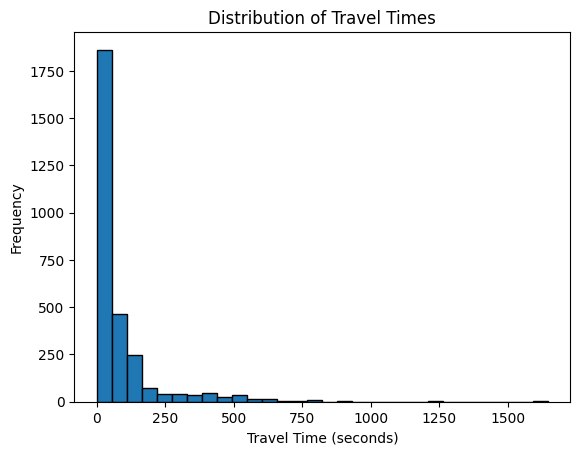

In [22]:

plt.hist(df['TravelTimeInSeconds'], bins=30, edgecolor='black')
plt.title('Distribution of Travel Times')
plt.xlabel('Travel Time (seconds)')
plt.ylabel('Frequency')
plt.show()


In [23]:
# missing_data = df_cleaned.isnull().sum()
missing_data = df.isnull().sum()
print(missing_data)


LineRef                        0
BlockRef                       0
Day                            0
VehicleJourneyRef              0
DestinationAimedArrivalTime    0
JourneyCode                    0
Total Distance                 0
Run Time                       0
FromStopID                     0
FromStopLocation               0
ToStopID                       0
ToStopLocation                 0
AimedDepartureTime             0
AimedArrivalTime               0
ActualDepartureTime            0
ActualArrivalTime              0
RouteID                        0
ActualDepartureDateTime        0
ActualArrivalDateTime          0
DepartureDate                  0
ArrivalDate                    0
TravelTime                     0
TravelTimeInSeconds            0
ArrivalDifference              0
DepartureDifference            0
dtype: int64


In [25]:
df.shape

(2941, 25)

In [26]:
df['HourOfDay'] = df['ActualDepartureTime'].dt.hour
df['HourOfDay'].unique()

array([ 6,  8, 11, 13, 15, 18, 16, 12,  7,  9, 14, 10, 17,  0, 23],
      dtype=int32)

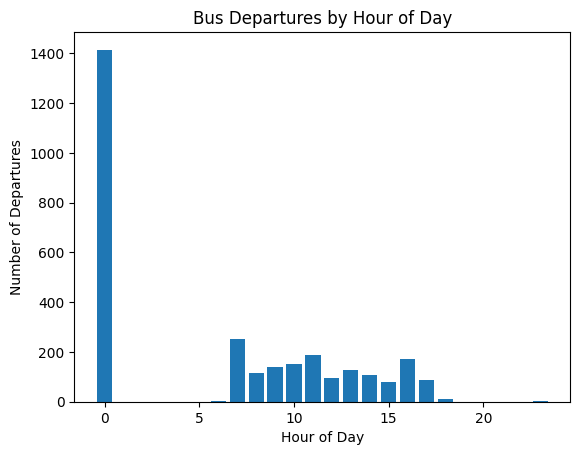

In [27]:
df['HourOfDay'] = df['ActualDepartureTime'].dt.hour

# Frequency count of departures by hour of day
hourly_operations = df['HourOfDay'].value_counts().sort_index()

plt.bar(hourly_operations.index, hourly_operations.values)
plt.title('Bus Departures by Hour of Day')
plt.xlabel('Hour of Day')
plt.ylabel('Number of Departures')
plt.show()


The plot above shows modal values between peak hours of 6 am, 12 noon  and 4 -5 pm in terms of departure times. Having about 1400 departures at 0 hour which is 12 am has to do with data collection incosistencies as data was collected over the course of two weeks, and run times for NT1 bus aims to end by 23:30:00 daily.

In [28]:
# Group by both JourneyCode and VehicleJourneyRef, then calculate mean travel time
journey_travel_time = df.groupby(['JourneyCode', 'VehicleJourneyRef'])['TravelTime'].mean()

# Print the result
print(journey_travel_time)

# Group by both JourneyCode and VehicleJourneyRef, then calculate mean arrival difference
journey_arrival_diff = df.groupby(['JourneyCode', 'VehicleJourneyRef'])['ArrivalDifference'].mean()

# Print the result
print(journey_arrival_diff)

JourneyCode  VehicleJourneyRef                                     
1005.0       NT1-Out-2001-NT3390B2-2024-08-22T00:02:00-2024-08-21      0.767949
             NT1-Out-2001-NT3390B2-2024-08-23T00:02:00-2024-08-22      0.837179
             NT1-Out-2001-NT3390B2-2024-08-30T00:02:00-2024-08-29      1.016049
1006.0       NT1-Out-2001-NT3390B2-2024-08-22T00:02:00-2024-08-21      0.358772
             NT1-Out-2001-NT3390B2-2024-08-23T00:02:00-2024-08-22      0.385714
                                                                         ...   
2094.0       NT1-Out-1001-NT3390B2-2024-08-31T14:40:00-2024-08-31      1.691667
2105.0       NT1-In-4001-NT260007454-2024-08-31T14:34:00-2024-08-31    4.600000
2114.0       NT1-Out-6001-NT3390B2-2024-08-31T16:20:00-2024-08-31      0.572222
3018.0       NT1-Out-1001-NT3390B2-2024-09-01T11:00:00-2024-09-01      0.871429
3045.0       NT1-In-1001-NT260007454-2024-09-01T12:19:00-2024-09-01    0.250000
Name: TravelTime, Length: 338, dtype: float64
Journe

In [29]:
# getting punctuality rate
punctuality_rate_arrival = (df['ArrivalDifference'].abs() <= 5).mean() * 100
punctuality_rate_departure = (df['DepartureDifference'].abs() <= 5).mean() * 100

print(f"Punctuality Rate (Arrival): {punctuality_rate_arrival:.2f}%")
print(f"Punctuality Rate (Departure): {punctuality_rate_departure:.2f}%")


Punctuality Rate (Arrival): 54.95%
Punctuality Rate (Departure): 52.74%


In [30]:
# identifying outliers in Travel Time per group

# function to detect outliers within each group
def detect_outliers(group):
    Q1 = group['TravelTime'].quantile(0.25)
    Q3 = group['TravelTime'].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    # Return a boolean series indicating if each point is an outlier
    return group[(group['TravelTime'] < lower_bound) | (group['TravelTime'] > upper_bound)]

# Group by JourneyCode and VehicleJourneyRef and apply the outlier detection function
outliers = df.groupby(['JourneyCode', 'VehicleJourneyRef']).apply(detect_outliers).reset_index(drop=True)

# Display the relevant columns of the detected outliers
print(outliers[['JourneyCode', 'VehicleJourneyRef', 'FromStopID', 'ToStopID', 'TravelTime']])


     JourneyCode                                  VehicleJourneyRef  \
0         1005.0  NT1-Out-2001-NT3390B2-2024-08-30T00:02:00-2024...   
1         1005.0  NT1-Out-2001-NT3390B2-2024-08-30T00:02:00-2024...   
2         1005.0  NT1-Out-2001-NT3390B2-2024-08-30T00:02:00-2024...   
3         1005.0  NT1-Out-2001-NT3390B2-2024-08-30T00:02:00-2024...   
4         1005.0  NT1-Out-2001-NT3390B2-2024-08-30T00:02:00-2024...   
..           ...                                                ...   
258       2046.0  NT1-Out-3001-NT3390B2-2024-08-31T10:40:00-2024...   
259       2050.0  NT1-Out-4001-NT3390B2-2024-08-31T11:00:00-2024...   
260       2090.0  NT1-Out-7001-NT3390B2-2024-08-31T14:20:00-2024...   
261       2094.0  NT1-Out-1001-NT3390B2-2024-08-31T14:40:00-2024...   
262       2114.0  NT1-Out-6001-NT3390B2-2024-08-31T16:20:00-2024...   

     FromStopID    ToStopID  TravelTime  
0      3390ME09      3390S6    6.416667  
1      3390WI08    3390WI35   13.016667  
2      3390CL90    33

/var/folders/gs/fx6m51n14jl6gggxb3q4vbpc0000gn/T/ipykernel_10774/605189156.py:14: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  outliers = df.groupby(['JourneyCode', 'VehicleJourneyRef']).apply(detect_outliers).reset_index(drop=True)


outliers could be due to early schedules, wait times or other unforseen conditions.

In [31]:
# function to calculate the correlation matrix for each group
def compute_correlation(group):
    return group[['TravelTime', 'ArrivalDifference', 'DepartureDifference', 'HourOfDay']].corr()

# Group by JourneyCode and VehicleJourneyRef, then apply the correlation function
correlation_matrices = df.groupby(['JourneyCode', 'VehicleJourneyRef']).apply(compute_correlation)

# Print the correlation matrices
display(correlation_matrices)

# correlation matrices is a multi-index DataFrame where the first two levels are the group identifiers

/var/folders/gs/fx6m51n14jl6gggxb3q4vbpc0000gn/T/ipykernel_10774/2825728001.py:6: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  correlation_matrices = df.groupby(['JourneyCode', 'VehicleJourneyRef']).apply(compute_correlation)


TravelTime  \
JourneyCode VehicleJourneyRef                                                                    
1005.0      NT1-Out-2001-NT3390B2-2024-08-22T00:02:00-2024-... TravelTime             1.000000   
                                                               ArrivalDifference     -0.130142   
                                                               DepartureDifference   -0.172657   
                                                               HourOfDay                   NaN   
            NT1-Out-2001-NT3390B2-2024-08-23T00:02:00-2024-... TravelTime             1.000000   
...                                                                                        ...   
3018.0      NT1-Out-1001-NT3390B2-2024-09-01T11:00:00-2024-... HourOfDay                   NaN   
3045.0      NT1-In-1001-NT260007454-2024-09-01T12:19:00-202... TravelTime                  NaN   
                                                               ArrivalDifference           NaN   
                                                               DepartureDifference         NaN   
                                                               HourOfDay                   NaN   

                                                                                    ArrivalDifference  \
JourneyCode VehicleJourneyRef                                                                           
1005.0      NT1-Out-2001-NT3390B2-2024-08-22T00:02:00-2024-... TravelTime                   -0.130142   
                                                               ArrivalDifference             1.000000   
                                                               DepartureDifference           0.998591   
                                                               HourOfDay                          NaN   
            NT1-Out-2001-NT3390B2-2024-08-23T00:02:00-2024-... TravelTime                    0.043008   
...                                                                                               ...   
3018.0      NT1-Out-1001-NT3390B2-2024-09-01T11:00:00-2024-... HourOfDay                          NaN   
3045.0      NT1-In-1001-NT260007454-2024-09-01T12:19:00-202... TravelTime                         NaN   
                                                               ArrivalDifference                  NaN   
                                                               DepartureDifference                NaN   
                                                               HourOfDay                          NaN   

                                                                                    DepartureDifference  \
JourneyCode VehicleJourneyRef                                                                             
1005.0      NT1-Out-2001-NT3390B2-2024-08-22T00:02:00-2024-... TravelTime                     -0.172657   
                                                               ArrivalDifference               0.998591   
                                                               DepartureDifference             1.000000   
                                                               HourOfDay                            NaN   
            NT1-Out-2001-NT3390B2-2024-08-23T00:02:00-2024-... TravelTime                      0.002584   
...                                                                                                 ...   
3018.0      NT1-Out-1001-NT3390B2-2024-09-01T11:00:00-2024-... HourOfDay                            NaN   
3045.0      NT1-In-1001-NT260007454-2024-09-01T12:19:00-202... TravelTime                           NaN   
                                                               ArrivalDifference                    NaN   
                                                               DepartureDifference                  NaN   
                                                               HourOfDay                            NaN   

                                                   

## Distribution Analysis

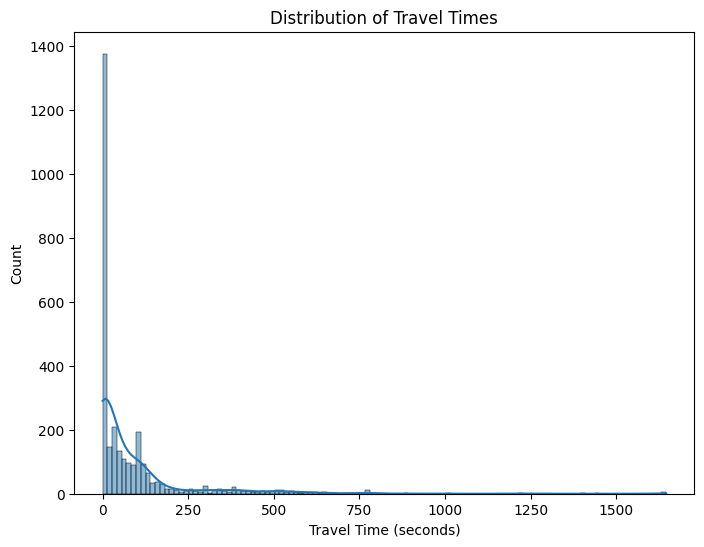

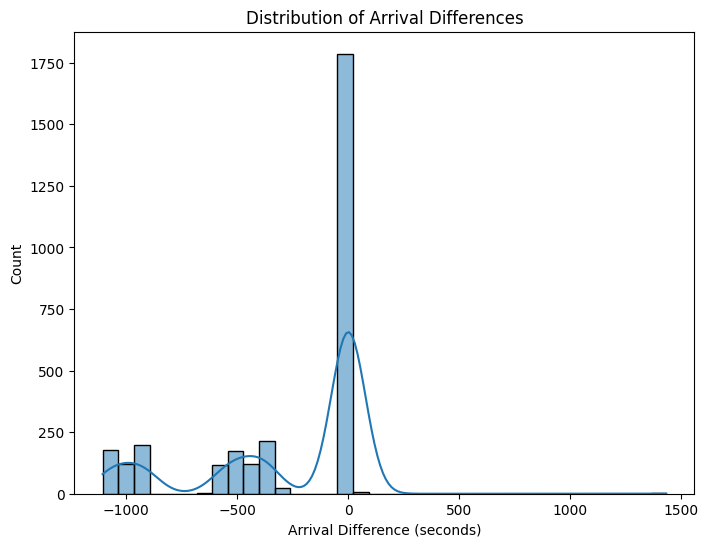

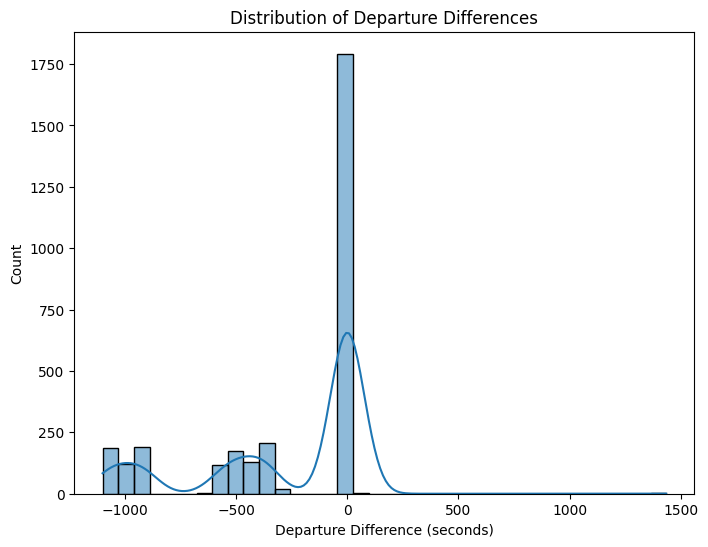

In [32]:
# Distribution Analysis
import seaborn as sns

# Distribution of travel times
plt.figure(figsize=(8, 6))
sns.histplot(df['TravelTimeInSeconds'], kde=True)
plt.title('Distribution of Travel Times')
plt.xlabel('Travel Time (seconds)')
plt.show()

# Distribution of arrival differences
plt.figure(figsize=(8, 6))
sns.histplot(df['ArrivalDifference'], kde=True)
plt.title('Distribution of Arrival Differences')
plt.xlabel('Arrival Difference (seconds)')
plt.show()

# Distribution of departure differences
plt.figure(figsize=(8, 6))
sns.histplot(df['DepartureDifference'], kde=True)
plt.title('Distribution of Departure Differences')
plt.xlabel('Departure Difference (seconds)')
plt.show()


In [33]:
df.columns

Index(['LineRef', 'BlockRef', 'Day', 'VehicleJourneyRef',
       'DestinationAimedArrivalTime', 'JourneyCode', 'Total Distance',
       'Run Time', 'FromStopID', 'FromStopLocation', 'ToStopID',
       'ToStopLocation', 'AimedDepartureTime', 'AimedArrivalTime',
       'ActualDepartureTime', 'ActualArrivalTime', 'RouteID',
       'ActualDepartureDateTime', 'ActualArrivalDateTime', 'DepartureDate',
       'ArrivalDate', 'TravelTime', 'TravelTimeInSeconds', 'ArrivalDifference',
       'DepartureDifference', 'HourOfDay'],
      dtype='object')

In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2941 entries, 0 to 2940
Data columns (total 26 columns):
 #   Column                       Non-Null Count  Dtype                    
---  ------                       --------------  -----                    
 0   LineRef                      2941 non-null   object                   
 1   BlockRef                     2941 non-null   float64                  
 2   Day                          2941 non-null   object                   
 3   VehicleJourneyRef            2941 non-null   object                   
 4   DestinationAimedArrivalTime  2941 non-null   object                   
 5   JourneyCode                  2941 non-null   float64                  
 6   Total Distance               2941 non-null   float64                  
 7   Run Time                     2941 non-null   object                   
 8   FromStopID                   2941 non-null   object                   
 9   FromStopLocation             2941 non-null   object 

## Correlation matrix

/Users/helen/Desktop/junks/env/lib/python3.12/site-packages/seaborn/matrix.py:202: RuntimeWarning: All-NaN slice encountered
  vmin = np.nanmin(calc_data)
/Users/helen/Desktop/junks/env/lib/python3.12/site-packages/seaborn/matrix.py:207: RuntimeWarning: All-NaN slice encountered
  vmax = np.nanmax(calc_data)
/Users/helen/Desktop/junks/env/lib/python3.12/site-packages/seaborn/matrix.py:202: RuntimeWarning: All-NaN slice encountered
  vmin = np.nanmin(calc_data)
/Users/helen/Desktop/junks/env/lib/python3.12/site-packages/seaborn/matrix.py:207: RuntimeWarning: All-NaN slice encountered
  vmax = np.nanmax(calc_data)


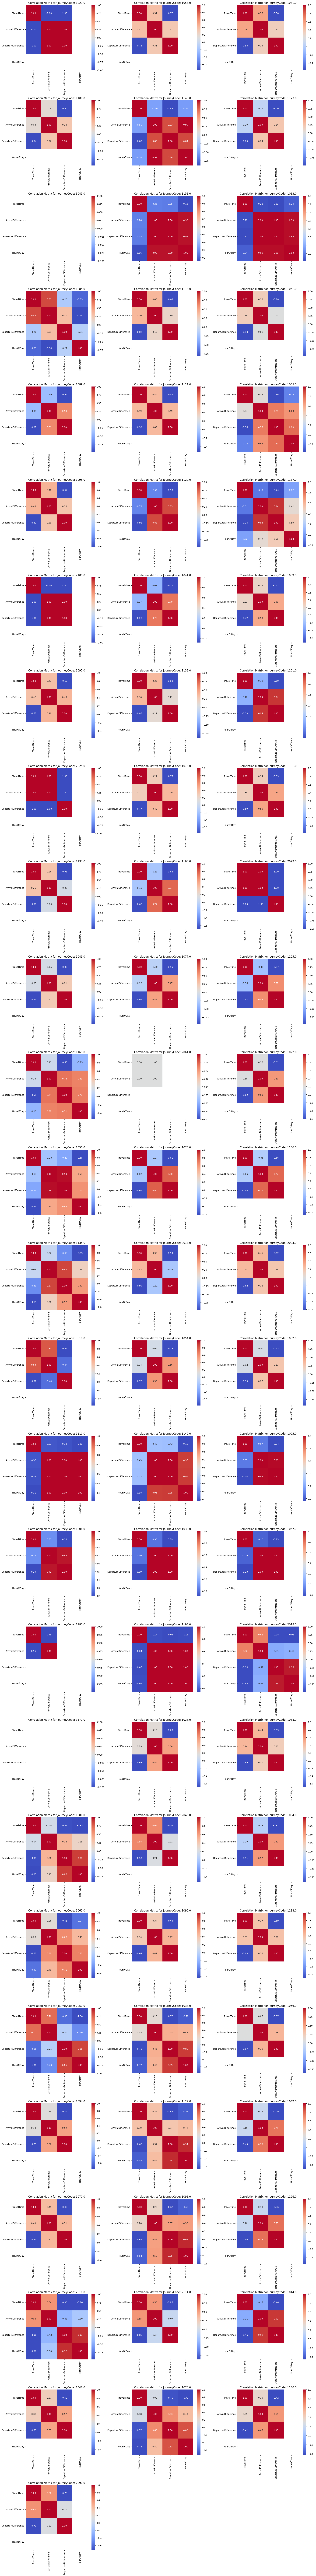

In [35]:
import matplotlib.pyplot as plt
import seaborn as sns
import math

# Group the data by JourneyCode and calculate correlation matrices for each group
grouped_corr_matrices = df.groupby('JourneyCode')[['TravelTime', 'ArrivalDifference', 'DepartureDifference', 'HourOfDay']].corr()

# Getting the unique JourneyCodes to determine the number of subplots needed
unique_journey_codes = df['JourneyCode'].unique()

# Determine the number of rows and columns for the subplots grid
num_groups = len(unique_journey_codes)
cols = 3  # Number of columns in the grid
rows = math.ceil(num_groups / cols)  # Number of rows in the grid

# Creating a figure for subplots
plt.figure(figsize=(20, rows * 6))

# Looping through each JourneyCode and plot the heatmap
for i, journey_code in enumerate(unique_journey_codes):
    plt.subplot(rows, cols, i + 1)
    
    # Extracting the correlation matrix for the current journey code
    corr_matrix = grouped_corr_matrices.xs(journey_code, level=0)
    
    # Plot  heatmap
    sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
    plt.title(f'Correlation Matrix for JourneyCode: {journey_code}')


plt.tight_layout()


plt.show()


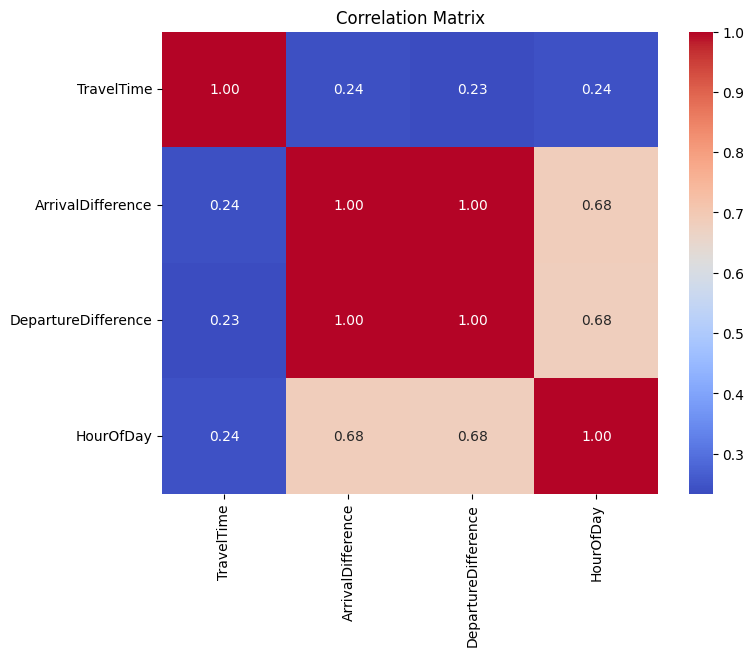

In [36]:
# Calculate correlation matrix
corr_matrix = df[['TravelTime', 'ArrivalDifference', 'DepartureDifference', 'HourOfDay']].corr()

# Plot heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()


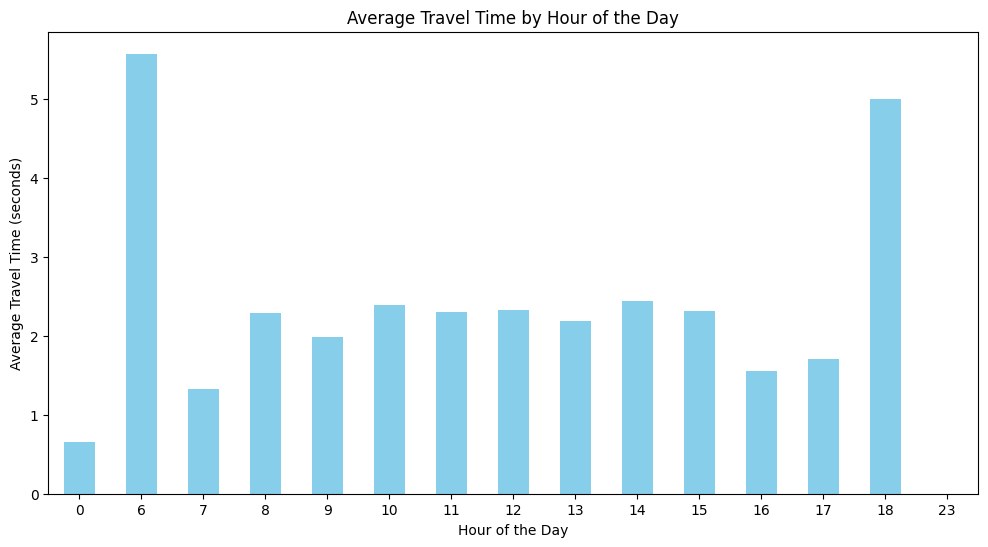

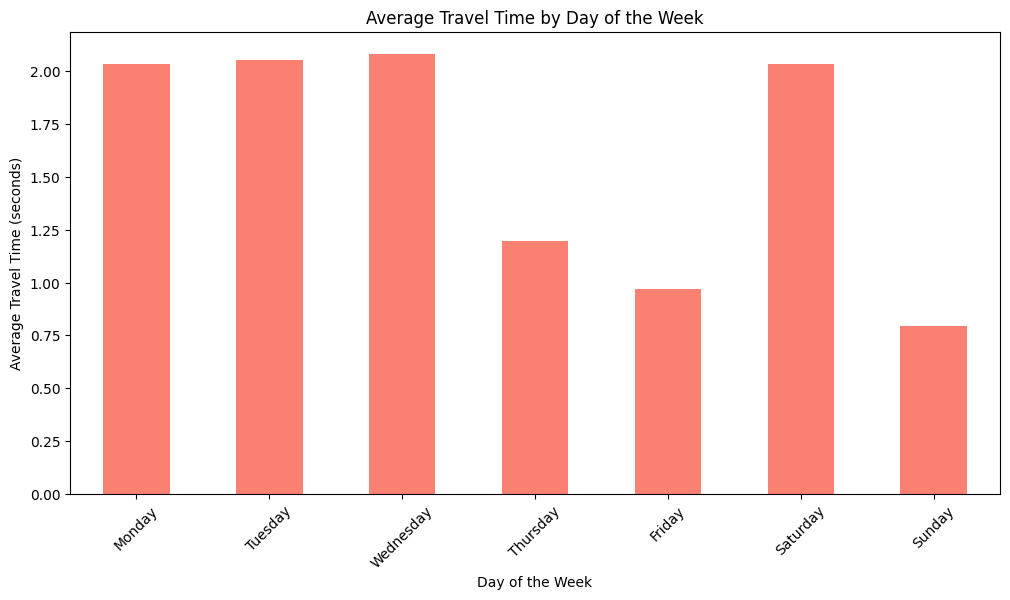

In [37]:

# 'ActualArrivalTime' as a datetime column
df['ActualArrivalTime'] = pd.to_datetime(df['ActualArrivalTime'])

# Extract hour from 'ActualArrivalTime'
df['HourOfDay'] = df['ActualArrivalTime'].dt.hour

# Aggregate travel time by hour of the day
hourly_travel_time = df.groupby('HourOfDay')['TravelTime'].mean()

# Plot hourly aggregated travel time
plt.figure(figsize=(12, 6))
hourly_travel_time.plot(kind='bar', color='skyblue')
plt.title('Average Travel Time by Hour of the Day')
plt.xlabel('Hour of the Day')
plt.ylabel('Average Travel Time (seconds)')
plt.xticks(rotation=0)  # Rotate x-axis labels if needed
plt.show()

# Aggregate travel time by day of the week 
df['DayOfWeek'] = df['ActualArrivalTime'].dt.day_name()
daily_travel_time = df.groupby('DayOfWeek')['TravelTime'].mean()

# Plot daily aggregated travel time (optional)
plt.figure(figsize=(12, 6))
daily_travel_time = daily_travel_time.reindex(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
daily_travel_time.plot(kind='bar', color='salmon')
plt.title('Average Travel Time by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Average Travel Time (seconds)')
plt.xticks(rotation=45)  # Rotating x-axis 
plt.show()

the travel time increase arounf 6 pm indicates more delays around the time.

The previous plot shows a high number of bus departures around 6am to 7:30am, this could account for lesser travel times around same time period in the above plot. Since there are many buses to traverse with, lesser dwell times are spent at each bus stop resulting in shorter trips around the time.

1. Variation in Travel Time Throughout the Day:
The average travel time appears to fluctuate significantly over the course of the day. There is a sharp drop in travel time early in the morning (around 06:00), followed by a gradual increase until around midday, and then another fluctuation in the afternoon.

2. Potential Peak Hours:
The sharp increase in travel time towards the end of the plot (around 18:00) might indicate a potential peak hour where travel times are higher, possibly due to traffic congestion, higher demand, or other factors that cause delays.

3. Early Morning Low:
The very low average travel time observed around 06:00 suggests that this could be a period of low traffic or other favorable conditions that allow for faster travel.

4. Midday Consistency:
The relatively stable travel times observed between 09:00 and 15:00 might suggest that these hours experience consistent traffic conditions or that the operations during these times are more stable.

5. End of Day Spike:
The significant spike in travel time towards the end of the day could be associated with the evening rush hour when travel times tend to increase due to higher traffic volumes.


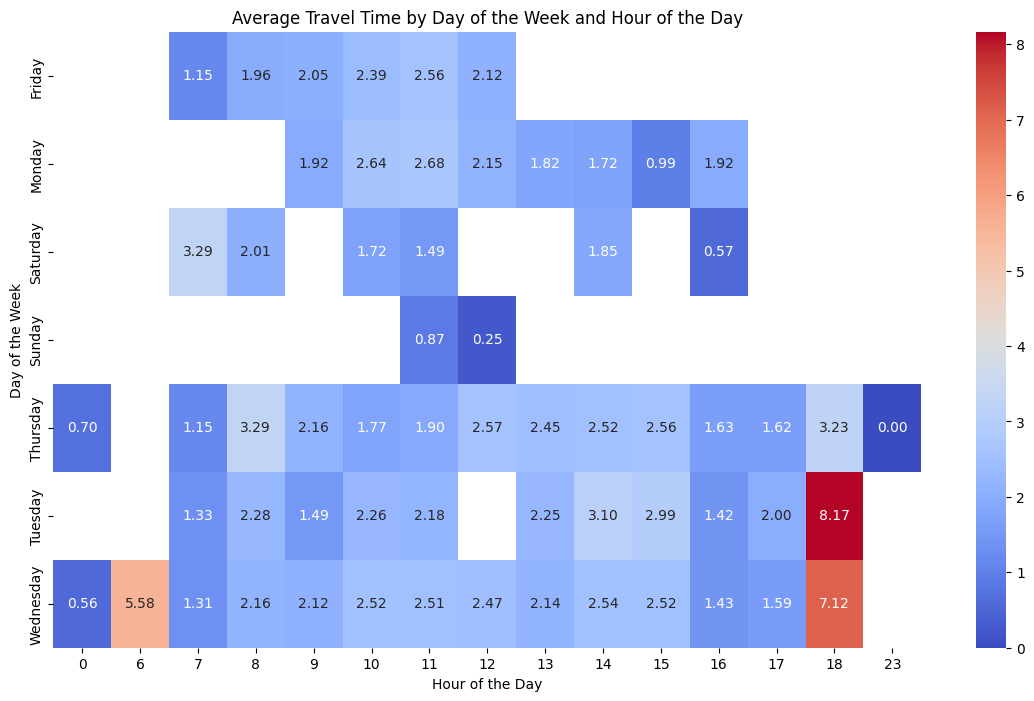

In [38]:
# Ensuring 'ActualArrivalTime' is in datetime format
df['ActualArrivalTime'] = pd.to_datetime(df['ActualArrivalTime'])

# Extract the hour from 'ActualArrivalTime'
df['ArrivalHour'] = df['ActualArrivalTime'].dt.hour

# Group by 'Day' and 'ArrivalHour' to calculate the mean travel time
mean_travel_times = df.groupby(['Day', 'ArrivalHour'])['TravelTime'].mean().unstack()

# Plotting the heatmap to visualize the average travel times by day and hour
plt.figure(figsize=(14, 8))
sns.heatmap(mean_travel_times, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Average Travel Time by Day of the Week and Hour of the Day')
plt.xlabel('Hour of the Day')
plt.ylabel('Day of the Week')
plt.show()

In [39]:
df.head()

,LineRef,BlockRef,Day,VehicleJourneyRef,DestinationAimedArrivalTime,JourneyCode,Total Distance,Run Time,FromStopID,FromStopLocation,...,ActualArrivalDateTime,DepartureDate,ArrivalDate,TravelTime,TravelTimeInSeconds,ArrivalDifference,DepartureDifference,HourOfDay,DayOfWeek,ArrivalHour
0,NT1,1001.0,Wednesday,NT1-In-1001-NT260007454-2024-08-21T06:36:00-20...,06:37:00,1021.0,195.868599,PT0S,260007454,"(np.float64(-1.2052472), np.float64(52.7720907))",...,2024-08-21 06:35:51+01:00,2024-08-21,2024-08-21,9.30,558.0,-0.150000,-9.450000,6,Wednesday,6
1,NT1,1001.0,Wednesday,NT1-In-1001-NT260007454-2024-08-21T06:36:00-20...,06:37:00,1021.0,346.400087,PT1M,260007423,"(-1.202979, 52.7731152)",...,2024-08-21 06:37:42+01:00,2024-08-21,2024-08-21,1.85,111.0,0.700000,-0.150000,6,Wednesday,6
2,NT1,1001.0,Wednesday,NT1-In-1001-NT260007454-2024-08-21T08:56:00-20...,08:57:00,1053.0,195.868599,PT0S,260007454,"(np.float64(-1.2052472), np.float64(52.7720907))",...,2024-08-21 08:57:05+01:00,2024-08-21,2024-08-21,5.40,324.0,1.083333,-4.316667,8,Wednesday,8
3,NT1,1001.0,Wednesday,NT1-In-1001-NT260007454-2024-08-21T08:56:00-20...,08:57:00,1053.0,346.400087,PT1M,260007423,"(-1.202979, 52.7731152)",...,2024-08-21 08:59:23+01:00,2024-08-21,2024-08-21,2.30,138.0,2.383333,1.083333,8,Wednesday,8
4,NT1,1001.0,Wednesday,NT1-In-1001-NT260007454-2024-08-21T11:14:00-20...,11:15:00,1081.0,195.868599,PT0S,260007454,"(np.float64(-1.2052472), np.float64(52.7720907))",...,2024-08-21 11:06:27+01:00,2024-08-21,2024-08-21,0.00,0.0,-7.550000,-7.550000,11,Wednesday,11


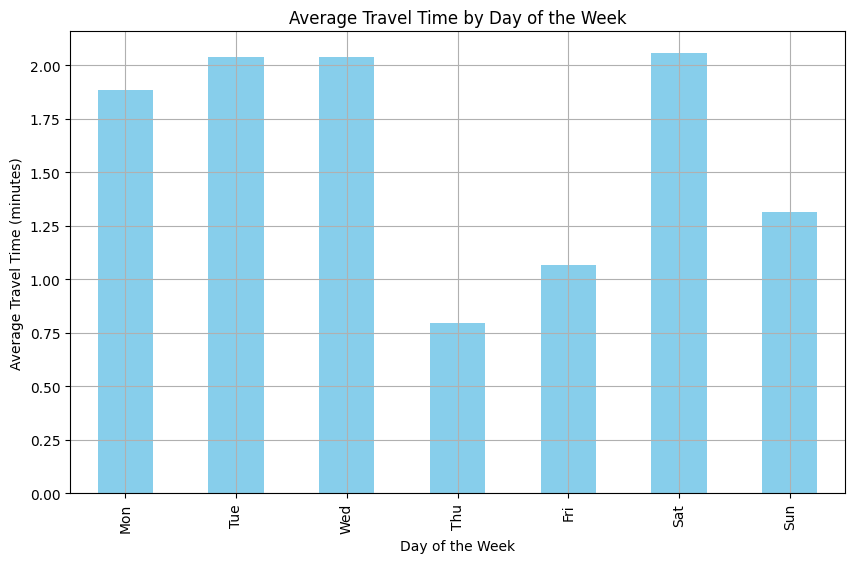

In [40]:
# Group by 'Day' to calculate the average travel time for each day of the week
avg_travel_time_day = df.groupby('Day')['TravelTime'].mean()


# Plot average travel time by day of the week
plt.figure(figsize=(10, 6))
avg_travel_time_day.plot(kind='bar', color='skyblue')
plt.title('Average Travel Time by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Average Travel Time (minutes)')
plt.xticks(ticks=range(7), labels=['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'])
plt.grid(True)
plt.show()

In [41]:
print(df.columns)

Index(['LineRef', 'BlockRef', 'Day', 'VehicleJourneyRef',
       'DestinationAimedArrivalTime', 'JourneyCode', 'Total Distance',
       'Run Time', 'FromStopID', 'FromStopLocation', 'ToStopID',
       'ToStopLocation', 'AimedDepartureTime', 'AimedArrivalTime',
       'ActualDepartureTime', 'ActualArrivalTime', 'RouteID',
       'ActualDepartureDateTime', 'ActualArrivalDateTime', 'DepartureDate',
       'ArrivalDate', 'TravelTime', 'TravelTimeInSeconds', 'ArrivalDifference',
       'DepartureDifference', 'HourOfDay', 'DayOfWeek', 'ArrivalHour'],
      dtype='object')


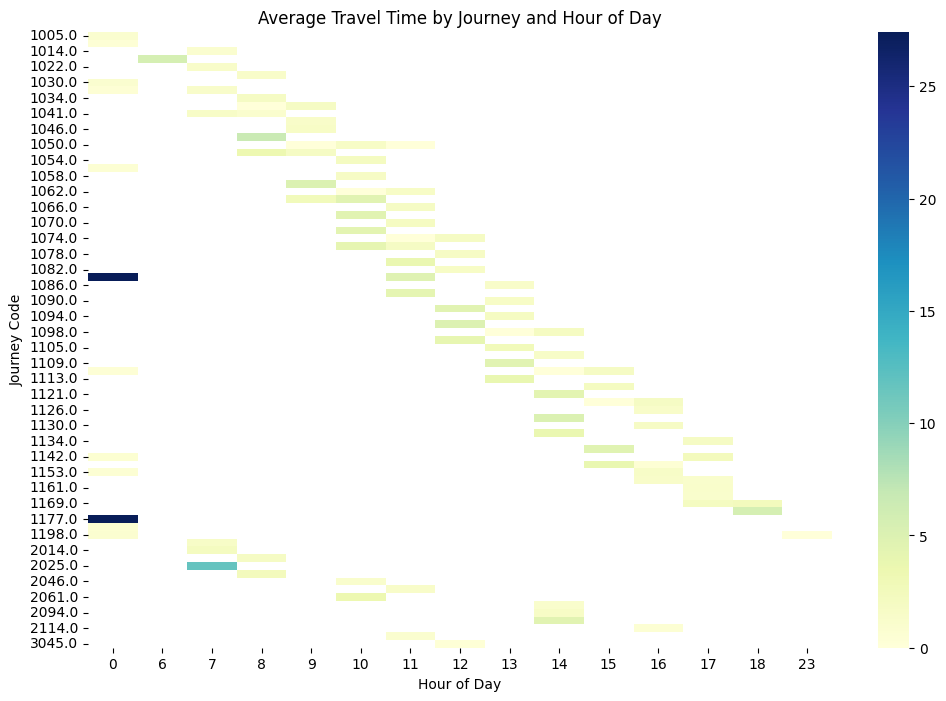

In [42]:
# Average travel time by route and hour of day
journey_hour_travel_time = df.groupby(['JourneyCode', 'HourOfDay'])['TravelTime'].mean().unstack()

# Heatmap of the interaction between Journey and hour of day
plt.figure(figsize=(12, 8))
sns.heatmap(journey_hour_travel_time, cmap='YlGnBu')
plt.title('Average Travel Time by Journey and Hour of Day')
plt.xlabel('Hour of Day')
plt.ylabel('Journey Code')
plt.show()


Observations 

1. Each Journey Code shows a different pattern of travel time throughout the day. This indicates that the duration of travel is not uniform across different routes or trips.
2. Some Journey Codes have distinct patterns where travel times peak during specific hours. For example, several journeys (e.g., around Journey Code 1086.0, 1090.0) show higher travel times between 7 AM and 8 AM, which could correspond to rush hour.
For some Journey Codes, travel times are higher in the morning and decrease as the day progresses (e.g., Journey Code 1086.0 to 1105.0).

3. Some journeys appear to have relatively consistent travel times throughout the day (e.g., Journey Code 1022.0), while others show significant variation, with certain hours having much longer travel times compared to others (e.g., Journey Code 1198.0).
4. The color intensity (from light yellow to dark blue) represents the average travel time, with darker shades indicating longer travel times.
For example, dark blue areas around 7 AM for several journey codes indicate these periods experience higher average travel times, likely due to congestion or other delays.

In [43]:
df.head()

,LineRef,BlockRef,Day,VehicleJourneyRef,DestinationAimedArrivalTime,JourneyCode,Total Distance,Run Time,FromStopID,FromStopLocation,...,ActualArrivalDateTime,DepartureDate,ArrivalDate,TravelTime,TravelTimeInSeconds,ArrivalDifference,DepartureDifference,HourOfDay,DayOfWeek,ArrivalHour
0,NT1,1001.0,Wednesday,NT1-In-1001-NT260007454-2024-08-21T06:36:00-20...,06:37:00,1021.0,195.868599,PT0S,260007454,"(np.float64(-1.2052472), np.float64(52.7720907))",...,2024-08-21 06:35:51+01:00,2024-08-21,2024-08-21,9.30,558.0,-0.150000,-9.450000,6,Wednesday,6
1,NT1,1001.0,Wednesday,NT1-In-1001-NT260007454-2024-08-21T06:36:00-20...,06:37:00,1021.0,346.400087,PT1M,260007423,"(-1.202979, 52.7731152)",...,2024-08-21 06:37:42+01:00,2024-08-21,2024-08-21,1.85,111.0,0.700000,-0.150000,6,Wednesday,6
2,NT1,1001.0,Wednesday,NT1-In-1001-NT260007454-2024-08-21T08:56:00-20...,08:57:00,1053.0,195.868599,PT0S,260007454,"(np.float64(-1.2052472), np.float64(52.7720907))",...,2024-08-21 08:57:05+01:00,2024-08-21,2024-08-21,5.40,324.0,1.083333,-4.316667,8,Wednesday,8
3,NT1,1001.0,Wednesday,NT1-In-1001-NT260007454-2024-08-21T08:56:00-20...,08:57:00,1053.0,346.400087,PT1M,260007423,"(-1.202979, 52.7731152)",...,2024-08-21 08:59:23+01:00,2024-08-21,2024-08-21,2.30,138.0,2.383333,1.083333,8,Wednesday,8
4,NT1,1001.0,Wednesday,NT1-In-1001-NT260007454-2024-08-21T11:14:00-20...,11:15:00,1081.0,195.868599,PT0S,260007454,"(np.float64(-1.2052472), np.float64(52.7720907))",...,2024-08-21 11:06:27+01:00,2024-08-21,2024-08-21,0.00,0.0,-7.550000,-7.550000,11,Wednesday,11


In [44]:

# Group by TravelTimeInSeconds and count the number of occurrences
travel_time_occurrences = df['TravelTimeInSeconds'].value_counts().reset_index()

# Rename the columns to make it more readable
travel_time_occurrences.columns = ['TravelTimeInSeconds', 'Occurrences']

# Sort by the number of occurrences in descending order
travel_time_occurrences = travel_time_occurrences.sort_values(by='Occurrences', ascending=False)

# Display the result
print(travel_time_occurrences)


     TravelTimeInSeconds  Occurrences
0                    0.0         1351
1                   30.0           59
2                   60.0           35
3                  108.0           33
4                   44.0           28
..                   ...          ...
363                386.0            1
362                678.0            1
361                481.0            1
360                601.0            1
357                607.0            1

[381 rows x 2 columns]


In [45]:
df =df.drop(['Total Distance', 'Run Time'], axis=1)

In [46]:
df.to_csv('./df_desc.cv', index =False)